# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [69]:
#1
url= 'https://raw.githubusercontent.com/ihavenonamesad/DataMining_W4_Dataset_Eka-Suwandi-Yuliantho/refs/heads/main/penguins_size.csv'
df= pd.read_csv(url)
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
63,Adelie,Biscoe,41.1,18.2,192.0,4050.0,MALE
231,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,MALE
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE
90,Adelie,Dream,35.7,18.0,202.0,3550.0,FEMALE
293,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,FEMALE
60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,FEMALE
225,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,FEMALE
202,Chinstrap,Dream,48.1,16.4,199.0,3325.0,FEMALE
39,Adelie,Dream,39.8,19.1,184.0,4650.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [68]:
#2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    int32  
 1   island             334 non-null    int32  
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 17.0 KB


3. Show describe column and conclude what the insight is from that column

In [15]:
#3
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [16]:
print(df['species'].value_counts(dropna=False))
print(df['island'].value_counts(dropna=False))
print(df['sex'].value_counts(dropna=False))

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
MALE      168
FEMALE    165
NaN        10
.           1
Name: sex, dtype: int64


5. Null handling

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

6. Create your own insightful visualization and explain it in at least 2 sentences

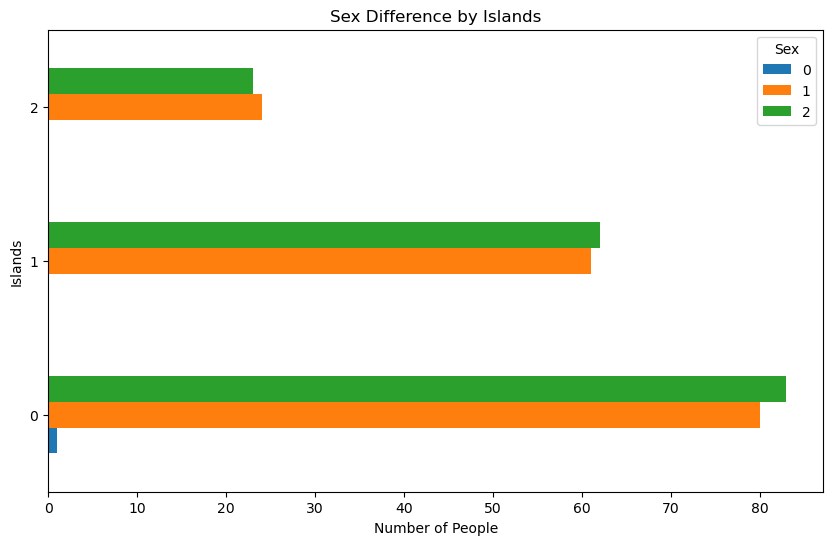

From this data we can see that overall the population's sex is almoost equally male and female.
While males are mostly on the lead on Dream and Biscoe, Torgersen mostly has females


In [67]:
count_type_by_quality = df.groupby(['island','sex'])['sex'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Sex Difference by Islands')
plt.ylabel('Islands')
plt.xlabel('Number of People')
plt.legend(title='Sex')
plt.show()
print("From this data we can see that overall the population's sex is almoost equally male and female.")
print("While males are mostly on the lead on Dream and Biscoe, Torgersen mostly has females")

7. Check unique value of our target variable

In [26]:
#7
print(df['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [27]:
#8
label_encoders = {}
categorical_cols = ['island', 'sex']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


9. encode the target column and display the results

In [28]:
#9
label_encoders = {}
categorical_cols = ['species']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


10. create a heatmap to see the correlation and explain the conclusion

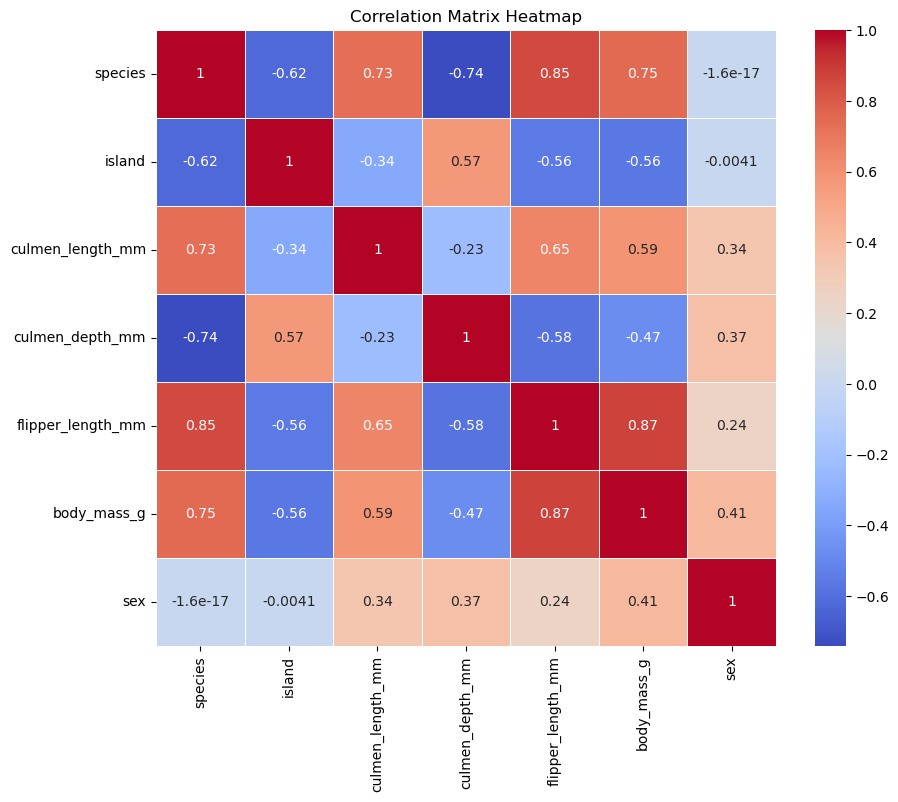

In [29]:
#10
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

print("From this heatmap we can see several things like species, island, and sex.")
print("Judging from those, it concludes that males are bigger than females according to the matrix.")

## Machine Learning

1. Splitting X and y

In [30]:
#1
X = df.drop('species', axis=1)
y = df['species']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [31]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
#3
X_train.shape, X_test.shape

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [38]:
#Criterion Entropy
#a
entr = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
entr.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [39]:
#b
y_pred_en = entr.predict(X_test)

In [35]:
#c
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9701


In [42]:
#d
print("Training set score: {:0.4f}".format(entr.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(entr.score(X_test, y_test)))

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113, 50, 1]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2, 5, 96]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 46.55\nentropy = 0.863\nsamples = 7\nvalue = [2, 5,

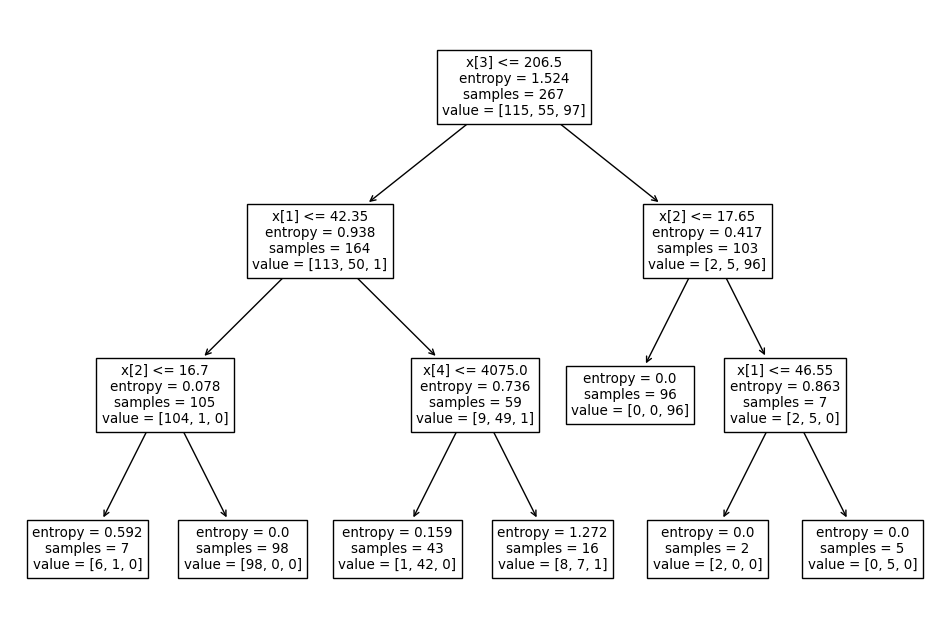

In [43]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(entr.fit(X_train, y_train))

2. Criterion Gini index

In [44]:
#a
gin = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
gin.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [45]:
#b
y_pred_gini = gin.predict(X_test)

In [47]:
#c
print("Model accuracy score with criterion gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9851


In [48]:
#d
print("Training set score: {:0.4f}".format(gin.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(gin.score(X_test, y_test)))

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113, 50, 1]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2, 46, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2, 5, 96]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 46.55\ngini = 0.408\nsamples = 7\nvalue = [2, 5, 0]'),
 Text(0.75, 0.125, 'gini = 0.

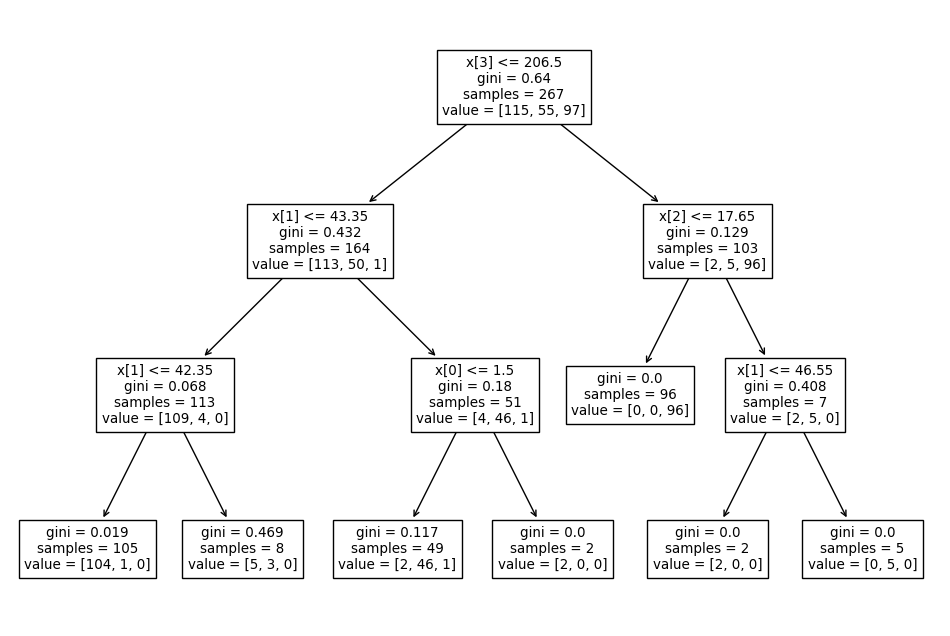

In [50]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(gin.fit(X_train, y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [55]:
#f
cm_entr = confusion_matrix(y_test, y_pred_en)
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Entropy")
print(cm_entr)
print("Confusion Matrix Gini Index")
print(cm_gini)

Confusion Matrix Entropy
[[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion Matrix Gini Index
[[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [56]:
#g
print("Entropy")
print(classification_report(y_test, y_pred_en))
print()
print("Gini Index")
print(classification_report(y_test, y_pred_gini))

Entropy
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67


Gini Index
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [57]:
#h
print("Both models perform exceptionally well, but the Gini Index model slightly outperforms the Entropy model, ")
print("especially in precision for class 1 and overall accuracy.")

Both models perform exceptionally well, but the Gini Index model slightly outperforms the Entropy model, 
especially in precision for class 1 and overall accuracy.


## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [58]:
#a
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [59]:
#b
nb_y_pred = nb_classifer.predict(X_test)

In [62]:
#c
print("Confusion Matrix")
cm_nb = confusion_matrix(y_test, nb_y_pred)
print(cm_nb)

#d
print("Accuracy Score: {0:0.2f}".format(accuracy_score(y_test, nb_y_pred)))

Confusion Matrix
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score: 1.00


In [63]:
#e
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [66]:
#f
print("The Naive Bayes model achieved perfect accuracy, with precision, recall, and F1-scores all at 1.00.")
print("This could mean the dataset is ideal for Naive Bayes, where features are independent, or it might indicate the dataset is simple and easily separable for this task.")

The Naive Bayes model achieved perfect accuracy, with precision, recall, and F1-scores all at 1.00.
This could mean the dataset is ideal for Naive Bayes, where features are independent, or it might indicate the dataset is simple and easily separable for this task.


Good Luck :)